In [1]:
import os
import random

from ocr.helpers.plot import *
from ocr.ocr import OCR

d:\AppData\miniconda3\envs\ocr\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight C:\Users\dinhd\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [4]:
ocr_model = OCR()

0.1434:                preprocessing_pipeline


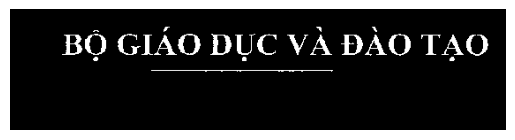

bộ giáo dục v. à đào tạo 
0310000000199 
0.9000:                sub_predict


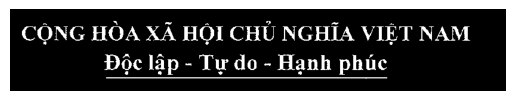

cộng hòa xã hội chủ nghĩa việt nam 
độc lập - tự do - hạnh phúc - do - 
1.7303:                sub_predict


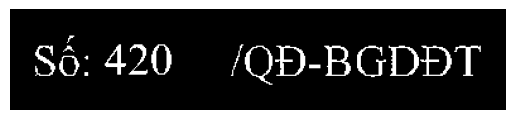

số: 420 /qđ-bgdđt 
0.2946:                sub_predict


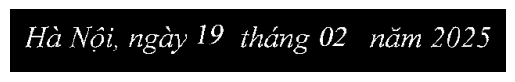

hà nội, ngày 19 tháng 02 năm 2025 
0.5150:                sub_predict


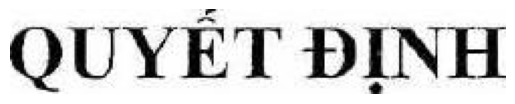

0.3301:                sub_predict


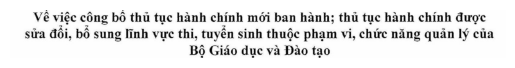

0.4943:                sub_predict


0.2790:                sub_predict


['bộ giáo dục v. à đào tạo \n0310000000199 ',
 'cộng hòa xã hội chủ nghĩa việt nam \nđộc lập - tự do - hạnh phúc - do - ',
 'số: 420 /qđ-bgdđt ',
 'hà nội, ngày 19 tháng 02 năm 2025 ',
 'quyét định\n',
 'về việc công bô thủ tục hành chính mới ban hành; thủ tục hành chính được\nsửa đôi, bô sung lĩnh vực thi, tuyên sinh thuộc phạm vi, chức năng quản lý của\nbộ giáo dục và đào tạo\n',
 '']

In [5]:
files = os.listdir("./data/img_data")
file = random.choice(files)

ocr_model.forward(os.path.join("./data/img_data", file))